# Understanding Likelihood

In this lecture, we are going to look at the second component of Bayesian modeling - the likelihood. The likelihood function contains all relevant information from the data, and states the probability of obtaining certain result conditioned on the model, but it's often overlooked in Bayesian inference. The likelihood is a funny concept which governs a significant part of the Bayes’ updating rule as well as Bayesian estimation and model comparison techniques, but the way how to find out likelihood is no more complex than we've gone through various probability distributions in week 2. So let's get started!

In [ ]:
# Suppose we switch our interest back to the weather data we explored in week 2 continuous distribution lecture
# that we want to know how the yearly average temperature in Detroit in particular, is distributed.
# To recap, I captured the total precipitation, snowfall and yearly average temperature of New York City, San Francisco 
# and Detroit for the past 30 years, from the The National Weather Service and National Oceanic and Atmospheric Administration websites.
# Before we view the data, we might still remember that the Detroit has the lowest average temperature among
# the three weather stations, and the temperature is around 50.

# One characteristic of yearly temperature is that it could take any value, so a continuous distribution should be
# used to describe the distribution. So let's start with using the normal prior. 

# To specify the prior, we need to import the stats module in scipy package.
from scipy import stats
# Now we can create a variable called prior_mean and set the prior mean (which is the average value) as 50.
prior_mean = 50
# and create another variable called prior_std and set the standard deviation as 5
prior_std = 5
# (so the variance is the square of 5, which is 25)
prior_var = 25
# and finally generate a random 100 samples of the normal prior with mean equals 50 and 
# standard deviation equals 5. 
prior = stats.norm.rvs(50, 5, 100)

<AxesSubplot:ylabel='Density'>

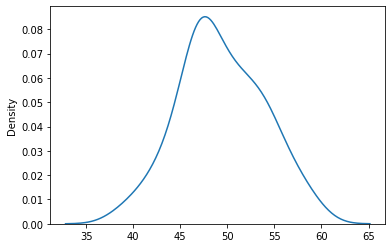

In [ ]:
# Now let's visualize the prior distribution.
import seaborn as sns
# Since the prior is defined by a continuous distribution, we can pass through the prior object and 
# generate a kernel density plot using the sns.kdeplot() function.
sns.kdeplot(prior)
# Cool! So you can see that the probability density peaks at roughly 50, which we statistically called the mode,
# and the density tapers off symmetrically on both sides. That means we believe that the yearly average 
# temperature in Detroit is most likely to be around 50, and progressively less likely to be far from 50.
# So that's our prior!

In [ ]:
# So what's the likelihood in this case? We can import the pandas package 
import pandas as pd
# and take in the weather dataset 
weather = pd.read_csv('assets/year_weather.csv')
# and look at the data again!
weather
# As you may recall, this dataset contains the 30-year record of snowfall, yearly precipitation and yearly average temperature
# so we're going to only look at the Detroit region this time and analyze the yearly average temperature only. 

,year,region,state,snow_inches,num_snow_day,precipitation_inches,num_rain_day,year_avg_temp
0,1990,Detroit,Michigan,41.8,36.4,42.6,171,51.3
1,1991,Detroit,Michigan,31.4,32.2,29.6,115,52.0
2,1992,Detroit,Michigan,43.5,24.7,37.3,153,48.8
3,1993,Detroit,Michigan,52.2,41.9,30.6,118,49.9
4,1994,Detroit,Michigan,45.8,31.9,31.0,117,50.4
...,...,...,...,...,...,...,...,...
85,2015,San Francisco,California,0.0,0.0,23.3,68,58.4
86,2016,San Francisco,California,0.0,0.0,32.3,85,57.8
87,2017,San Francisco,California,0.0,0.0,17.5,51,59.1
88,2018,San Francisco,California,0.0,0.0,25.7,74,57.4


In [ ]:
# Because of this, we need to subset only the rows where the region equals to 'Detroit'.
# So we create a new dataframe called detroit_weather to save the 30-year records only for Detroit.
detroit_weather = weather[weather['region'] == 'Detroit']

<AxesSubplot:xlabel='year_avg_temp', ylabel='Density'>

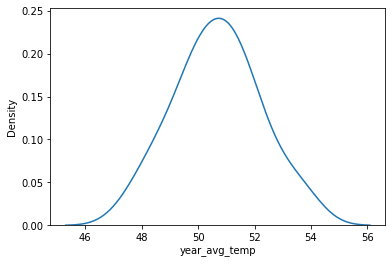

In [ ]:
# Now let's visualize the distribution of the 30-year records of yearly average temperature in Detroit,
# and again the kernel density plot using the sns.kdeplot() function can help you with that.
sns.kdeplot(detroit_weather['year_avg_temp'])

# Here you can see the distribution looks quite symmetric, with a mean locates at somewhere slightly more than 50,
# and the variability is low, I guess it's around 2 or 3. So by eyeballing it, we're confident to again use 
# the normal distribution as the likelihood function to represent the parameter yearly average temperature. 
# In this case, I would recommend just using the mean and standard deviation from the data itself to make the normal likelihood.

In [ ]:
# What does this information help you to update the event!?
# So we need our likelihood.

# Here's how we construct a normal likelihood. It requires no more than three things from our data:
# 1) The length of data
n = len(detroit_weather['year_avg_temp'])
# 2) The mean of the column
mean = np.mean(detroit_weather['year_avg_temp'])
# 3) The variance of the column
var = np.var(detroit_weather['year_avg_temp'])

0.07279930113937935

In [ ]:
# Now let's update our prior belief (remember we made a guess that the distribution is normal with mean 50 and
# standard deviation 5). It's mathetically convenient to update the normal distribution because the posterior 
# distribution would still be a normal distribution, just you'll see the mean and standard deviation become different.

# The posterior mean is defined by dividing the numerator and denominator, where
# 1) the numerator is computed by prior mean divided by the prior variance plus the sum of the 30-year record of
# Detroit's yearly average temperature over the variance of the data.
num = prior_mean / prior_var + sum(detroit_weather['year_avg_temp']) / var

# 2) the denominator is computed by 1 divided by prior variance plus the length of data divided by the variance of the data
denom = 1 / prior_var + n / var

# Cool! We're only one step towards finding the posterior. 
# We can divide the numerator by the denominator to get the posterior mean 
posterior_mean = num / denom
# and take the reciprocal of the denominator to get the posterior variance.
posterior_var = 1 / denom

<AxesSubplot:ylabel='Density'>

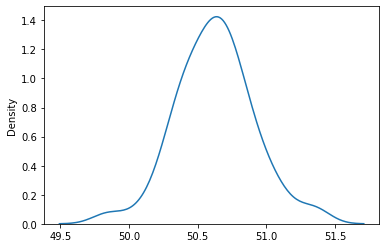

In [ ]:
# Cool! Let's visualize how the posterior distribution would look like! 
sns.kdeplot(stats.norm.rvs(posterior_mean, np.sqrt(posterior_var), 100))
# The posterior distribution of Detroit's yearly average temperature still looks highly symmetric, which
# is essentially the property of normal distribution. The posterior mode (where the highest point in probability 
# density occurred) still locates at somewhere slightly more than 50. What should be a noticeable difference
# between the prior and the posterior is that the spread of the distribution reduces significantly after 
# observing the data. When we specify the prior distribution, we see the values stretch from 35 to 65, but when the 
# data comes in, the distribution becomes much more precise: the values only span from 49.5 to 51.5, which is amazing.
# In other words, the posterior distribution demonstrates a much more precise prediction of the parameter than the prior
# because of the new evidence. That's pretty much the most important feature of the posterior distribution.

In [ ]:
# Potentially comparing with 

So in this lecture, we've seen how we 

Reference: https://stephens999.github.io/fiveMinuteStats/shiny_normal_example.htmlhttps://stephens999.github.io/fiveMinuteStats/shiny_normal_example.html

In [ ]:
# Appendix: A class that updates normal likelihood

class Normal:

    def __init__(self, known_var, prior_mean=0, prior_var=1):

        self.mean = prior_mean
        self.var = prior_var
        self.known_var = known_var

    def update(self, data):

        var = np.var(data)
        mean = np.mean(data)
        n = len(data)
        num = (self.mean / self.var + sum(data) / self.known_var)
        denom = (1.0 / self.var + n / self.known_var)
        # Posterior distribution after observing data
        return Normal(self.known_var, num / denom, 1.0 / denom)

    def pdf(self, x):
        return stats.norm.pdf(x, self.mean, np.sqrt(self.var))

    def cdf(self, x):
        return stats.norm.cdf(x, self.mean, np.sqrt(self.var))

    def posterior(self, lower, upper):
        if lower > upper:
            return 0.0
        return self.cdf(upper) - self.cdf(lower)
    
    def plot(self, lower=0.0, upper=1.0):
        x = np.linspace(lower, upper, 1001)
        y = stats.norm.pdf(x, self.mean, np.sqrt(self.var))
        ynorm = y / y.sum()
        sns.scatterplot(x, ynorm).set(title = 'Posterior normal distribution')
    
    def predict(self, x):
        return stats.norm.cdf(x, self.mean, np.sqrt(self.var + self.known_var))

    def sample(self):
        return np.random.normal(self.mean, np.sqrt(self.var + self.known_var))

(Appendix B: Optional Examples)


First of all, what would be the probability of observing this data if it was generated using the model I defined? How likely would we see different possible outcomes happen according to our model? The likelihood allows us to interpret our observations and is used to update our prior belief on a matter.

Imagine we’re interested in how effective COVID-19 vaccination could prevent infection. We came across a statement about Pfizer vaccination: 95% efficacy in preventing COVID-19 in those without prior infection. Then I can sample a set of random COVID-19 vaccine takers from different parts of the world and ask “what is the probability that the vaccine effectively prevents future infection we observe from the set of samples, given my model of Pfizer vaccination?” Suppose there isn’t any reported case among those vaccinated people, the likelihood of this model should be even higher than the prior distribution. So if we combine the prior distribution and the likelihood in the Bayesian modeling process, we are expected to see a probability lies closer to 1 in the posterior distribution. If the amount of data increases, the prior distribution will gradually be dominated by the likelihood. In other words, investigators with disparate prior distributions will converge to the same experimental result, that is, reaching the consensus.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d164461f-c4b7-4df2-b711-3a9e5e978d4a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>